In [1]:
# importing necessary libraries and setting up the path to where project data sets are saved 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.0'

In [3]:
%matplotlib inline

In [ ]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design'

# Additional data reformatting steps

In order to complete the exploratory visual analysis in this exercise, it was necessary to perform additional data reformatting/combining to the electric vehicle data set. 

At a high level, the following steps have been taken in Excel: 


Creating a table with ev_sales, ev_stock, ev_sales_share, and ev_stock_share for each region/vehicle_type/year combination. 
- In order to do this, the sales and stock data for each powertrain type (BEV, PHEV) had to be combined into one total value. That way there would be a single value for sales, stock, share of sales, and share of stock value for each region/vehicle_type/year combination 
- A second step to combine these two tables is to calculate the share of electric vehicle sales and share of electric vehicle stock for total eletric vehicles. It was only provided by specific vehicle_type in the original data set. In order to do this, a new variable will be derived: total_vehicle_sales and total_vehicle_stock which will measure all vehicles in the region rather than just electric vehicles. 
- These variables will be found by taking total ev_sales/ev_sales_share and to ev_stock/ev_stock_share for each region/vehicle_type/year combination. This will give total_vehicle_sales and total_vehicle_stock for each region/vehicle_type/year. 
- Next the total_vehicle_sales and total_vehicle_stock for each vehicle_type can be combined to get the totals for all vehicle_types 
- Now ev_sales/total_vehicle_sales and ev_stock/total_vehicle_stock for total vehicles can be calculated
- Now the necessary data is avaiable to finish combining the ev_sales/ev_stock table with the ev_sales_share/ev_stock_share table for each region/vehicle_type (including total)/year combination)
- Similar to previously used data sets, there will be one version with all missing data imputed with zero, and one without imputed values. 
- The total_vehicle_sales and total_vehicle_stock derived variables will be kept in the non-imputed version of the data set. This is because it is impossible to calculate this variable when there is no data reported for a specific region/year, so it does not make sense to include this in the imputed data set. 

To summarize the above steps there are now two new data sets which will be used in this analysis: 

EV_Sales_Stock_Share_imputed which includes the folliwing variables for all region/vehicle_type/year combinations, with all missing data imputed with zero: 
- region
- vehicle_type
- year
- ev_sales
- ev_stock
- ev_sales_share
- ev_stock_share


EV_Sales_Stock_Share which includes the following variables for each region/vehicle_type/year combinations without imputed values. Note this data set includes the newly derived total_vehicle_sales and total_vehicle_stock variables 
- region 
- vehicle_type
- year
- ev_sales
- ev_stock
- ev_sales_share
- ev_stock_share
- total_vehicle_sales
- total_vehicle_stock 


The next step will be to create a table that provides a single view that includes all of the data points for the analysis, ev sales, ev stock, ev sales share, ev stock share, and charging stations (and if possible the newly derived total vehicle sales and total vehicle stock variables). 

- The the charging station data is only broken down by region, year, and type of charging station (fast vs. slow), so the first step will be to create a table that summarizes the charging station data for each region/year combination (by summing together the fast and slow charging station values for each region/year combination) 
- There is no way to break the charging station data down by vehicle type, so when combining with the sales and stock data from the previous step with the charging station data, it will have to be all done at the total vehicle type level 
- A new table can be created that will have all sales, stock, and charger type data for each country/year combination for total electric vehicles 
- There is a slight issue combining the sales/stock data with the charger data, as the region column values do not align fully. There are columns for EU27, Europe, Other Europe, and Rest of World that do not exist in the charger data. There are columns in the charger data for Indonesia and Thailand, that do not exist in the sales/stock data. Since the purpose of the table is to analyze the relationships between the sales/stock data and the charging station data, the data for any region that does not exist in both data sets will be excluded. 
- Once the sales and stock data for total vehicles, and total charging station data for each region/year combination are merged into one table, it can be used for further analysis

To summarize there are two new data sets that will be used in the analysis: 

EV_Sales_Stock_Shares_Chargers_Imputed which includes the following variables for all region/year combinations, with all missing data imputed with zero:
- region
- year
- ev_sales (total electric vehicles)
- ev_stock (total electric vehicles
- ev_sales_share (total electric vehicles)
- ev_stock_share (total electric vehicles) 
- charger_count (both fast and slow type) 


EV_Sales_Stock_Shares_Chargers which includes the following variables for each region/year combination, without imputed data. Note this data set includes the newly derived total_vehicle_sales and total_vehicle_stock variables 
- region
- year
- ev_sales (total electric vehicles)
- ev_stock (total electric vehicles
- ev_sales_share (total electric vehicles)
- ev_stock_share (total electric vehicles) 
- charger_count (both fast and slow type) 
- total_vehicle_sales
- total_vehicle_stock



Note that the EV_sales_stock_imputed/EV_sales_stock and EV_chargers_imputed/EV_Chargers data sets from the previous exercise will also be used in this analysis. 
- This is because the EV_sales_stock data is the only way to access the powertrain_type variable and the EV_chargers data is the only way to access the charger_type variable 

The EV_shares_imputed and EV_shares data can be access in its entirety in the EV_sales_stock_share data set noted above, so it will not be imported

# Importing all cleaned data sets

In [5]:
# Importing the data sets for analysis 

df_sales_stock = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock.csv'))

In [6]:
df_sales_stock_imputed = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock_imputed.csv'))

In [7]:
df_sales_stock.head()

,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock
0,Australia,Cars,BEV,2011,49,49
1,Australia,Cars,BEV,2012,170,220
2,Australia,Cars,PHEV,2012,80,80
3,Australia,Cars,BEV,2013,190,410
4,Australia,Cars,PHEV,2013,100,180


In [8]:
df_sales_stock_imputed.head()

,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock
0,Australia,Cars,BEV,2010,0,0
1,Australia,Cars,PHEV,2010,0,0
2,Australia,Cars,BEV,2011,49,49
3,Australia,Cars,PHEV,2011,0,0
4,Australia,Cars,BEV,2012,170,220


In [9]:
df_chargers = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Charging_Stations.csv'))

In [10]:
df_chargers_imputed = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Charging_Stations_imputed.csv'))

In [11]:
df_chargers.head()

,region,charger_type,year,charger_count
0,Australia,Publicly Available Slow,2017,440.0
1,Australia,Publicly Available Fast,2017,40.0
2,Australia,Publicly Available Slow,2018,670.0
3,Australia,Publicly Available Fast,2018,61.0
4,Australia,Publicly Available Slow,2019,1700.0


In [12]:
df_chargers_imputed.head()

,region,charger_type,year,charger_count
0,Australia,Publicly Available Slow,2010,0.0
1,Australia,Publicly Available Fast,2010,0.0
2,Australia,Publicly Available Slow,2011,0.0
3,Australia,Publicly Available Fast,2011,0.0
4,Australia,Publicly Available Slow,2012,0.0


In [13]:
df_sales_stock_share = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock_Share.csv'))

In [14]:
df_sales_stock_share_imputed = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock_Share_imputed.csv'))

In [15]:
df_sales_stock_share.head()

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock
0,Australia,Cars,2011,49,49,0.00007,0.00000,753846,10652174
1,Australia,Cars,2012,250,300,0.00030,0.00003,833333,10714286
2,Australia,Cars,2013,290,590,0.00034,0.00005,852941,10925926
3,Australia,Cars,2014,1320,1880,0.00160,0.00017,825000,11058823
4,Australia,Cars,2015,1760,3600,0.00200,0.00032,880000,11249999


In [16]:
df_sales_stock_share_imputed.head()

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share
0,Australia,Cars,2010,0,0,0.00000,0.00000
1,Australia,Cars,2011,49,49,0.00007,0.00000
2,Australia,Cars,2012,250,300,0.00030,0.00003
3,Australia,Cars,2013,290,590,0.00034,0.00005
4,Australia,Cars,2014,1320,1880,0.00160,0.00017


In [17]:
df_total = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock_Share_Chargers.csv'))

In [18]:
df_total_imputed = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data', 'Cleaned_Data','EV_Sales_Stock_Share_Chargers_imputed.csv'))

In [19]:
df_total.head()

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock,charger_count
0,Australia,2011,49,49,0.00007,0.00000,753846,10652174,0.0
1,Australia,2012,250,300,0.00030,0.00003,833333,10714286,0.0
2,Australia,2013,290,590,0.00034,0.00005,852941,10925926,0.0
3,Australia,2014,1320,1880,0.00160,0.00017,825000,11058823,0.0
4,Australia,2015,1760,3600,0.00200,0.00032,880000,11249999,0.0


In [20]:
df_total_imputed.head()

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count
0,Australia,2010,0,0,0.00000,0.00000,0.0
1,Australia,2011,49,49,0.00007,0.00000,0.0
2,Australia,2012,250,300,0.00030,0.00003,0.0
3,Australia,2013,290,590,0.00034,0.00005,0.0
4,Australia,2014,1320,1880,0.00160,0.00017,0.0


# Correlations in Charger Count Data 

There are four data sets (with one imputed, one not imputed version of each) for this analysis. Since the goal is to determine relationships between variables in the data sets, there will not be much to analyze in the df_chargers and df_chargers_imputed data sets since those two data sets only have one column of quantitaive data. The charger_count variable is also included in the df_total data sets which will be analyzed in great detail later in this analysis. 

In [21]:
df_chargers.corr(numeric_only = True)

,year,charger_count
year,1.000000,0.168336
charger_count,0.168336,1.000000


In [22]:
df_chargers_imputed.corr(numeric_only = True)

,year,charger_count
year,1.000000,0.188287
charger_count,0.188287,1.000000


As if clear from the above analysis there is a weak positive relationship between charger_count and year, meaning that in the later years of the data set there tend to be more chargers. This relationship will be explored in much greater detail in later steps of the analysis when time series analysis is applied to the data sets. 

Also of note is that the relationship is very similar in both the imputed and non-imputed data sets. 

# Correlations and Scatterplots for EV Sales and EV Stock Data

The next data set to explore is the df_sales_stock and df_sales_stock_imputed data sets. There is only two quantitaive variables in these data sets, ev_sales and ev_stock. There will most likely be a strong relationship between these variables, it will be interesting to see how strong and if there are any unexpected characteristics to the relationship. 

In [23]:
df_sales_stock.corr(numeric_only = True)

,year,ev_sales,ev_stock
year,1.000000,0.146318,0.155991
ev_sales,0.146318,1.000000,0.991590
ev_stock,0.155991,0.991590,1.000000


In [24]:
df_sales_stock_imputed.corr(numeric_only = True)

,year,ev_sales,ev_stock
year,1.000000,0.136281,0.144880
ev_sales,0.136281,1.000000,0.991658
ev_stock,0.144880,0.991658,1.000000


As expected the correlation between ev_sales and ev_stock is almost perfect at over 0.99. Similar to charger_count, there is a very weak positive relationship between year and these two data points. This will be analyzed using time series analysis in later steps of the analysis. 

Again, the relationships between variables are very similar between the imputed and non-imputed data sets. 

Viewing this relationship as a scatterplot will help to visualize this relationship further. 

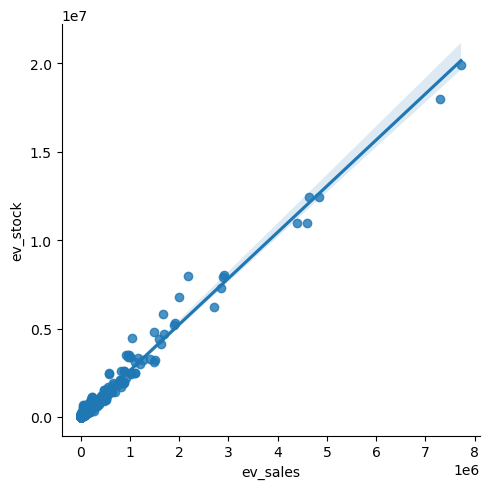

In [25]:
sns.lmplot(x = 'ev_sales', y = 'ev_stock', data = df_sales_stock)

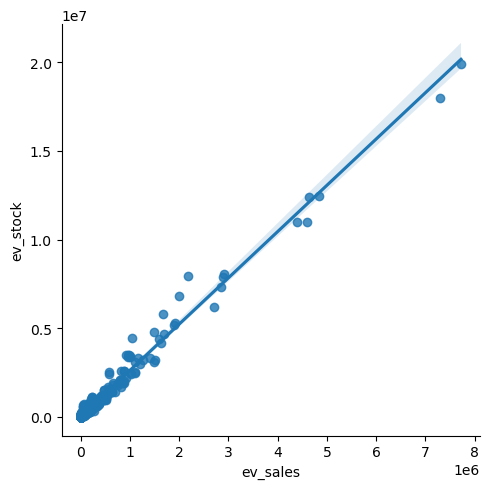

In [26]:
sns.lmplot(x = 'ev_sales', y = 'ev_stock', data = df_sales_stock_imputed)

As is clear from both scatterplots, the relationship between ev_sales and ev_stock is very strong, positive, and linear. The data points are closely clustered to the line of best fit, and there do not appear to be any significant outliers. This would indicate that ev_sales and ev_stock tend to grow in unison. This makes sense because as electric vehicle demand increases around the world, supply is also increased to meet that demand thus increasing the available stock. This would also indicate that it seems as though demand and supply have mostly been in balance, as both sales and stock grow at a very similar rate. It will be interesting to analyze this relationship in more detail to see how this relationship varies across regions/countries, and if one of these variables could be used to predict the other (available stock as a predictor of sales for example). 

# Correlation for EV Sales/EV stock vs. EV Share of Sales/EV Share of Stock

The next data that will be analyzed is the df_sales_stock_share and df_sales_stock_share_imputed data sets. This portion will focus on the relationship between ev_sales/ev_stock and ev_sales_share/ev_stock_share since the relationship between ev_sales and ev_stock was already shown to be strong and positive above

In [27]:
df_sales_stock_share.corr(numeric_only = True)

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock
year,1.000000,0.153282,0.161997,0.363783,0.308156,-0.026011,-0.001826
ev_sales,0.153282,1.000000,0.992401,0.145109,0.102568,0.537271,0.606723
ev_stock,0.161997,0.992401,1.000000,0.147115,0.115316,0.553706,0.626834
ev_sales_share,0.363783,0.145109,0.147115,1.000000,0.892217,-0.019211,-0.006242
ev_stock_share,0.308156,0.102568,0.115316,0.892217,1.000000,-0.021214,-0.016621
total_vehicle_sales,-0.026011,0.537271,0.553706,-0.019211,-0.021214,1.000000,0.983070
total_vehicle_stock,-0.001826,0.606723,0.626834,-0.006242,-0.016621,0.983070,1.000000


In [28]:
df_sales_stock_share_imputed.corr(numeric_only = True)

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share
year,1.000000,0.149218,0.157437,0.350454,0.299435
ev_sales,0.149218,1.000000,0.992441,0.156027,0.113072
ev_stock,0.157437,0.992441,1.000000,0.158572,0.126133
ev_sales_share,0.350454,0.156027,0.158572,1.000000,0.895147
ev_stock_share,0.299435,0.113072,0.126133,0.895147,1.000000


In [29]:
# Creating a subset of the non-imputed dataframe that only includes relevant columns
df_sales_stock_share.columns

Index(['region', 'vehicle_type', 'year', 'ev_sales', 'ev_stock',
       'ev_sales_share', 'ev_stock_share', 'total_vehicle_sales',
       'total_vehicle_stock'],
      dtype='object')

In [31]:
sales_stock_share_sub = df_sales_stock_share[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share', 'total_vehicle_sales', 'total_vehicle_stock']]

In [32]:
sales_stock_share_sub

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock
0,2011,49,49,0.00007,0.00000,753846,10652174
1,2012,250,300,0.00030,0.00003,833333,10714286
2,2013,290,590,0.00034,0.00005,852941,10925926
3,2014,1320,1880,0.00160,0.00017,825000,11058823
4,2015,1760,3600,0.00200,0.00032,880000,11249999
...,...,...,...,...,...,...,...
1768,2018,2286390,6034800,0.02149,0.00441,106369705,1369447799
1769,2019,2259380,8334800,0.02315,0.00577,97603941,1443378254
1770,2020,3164620,11478500,0.03635,0.00778,87067888,1474722799
1771,2021,6754200,17754000,0.07327,0.01186,92184336,1496758569


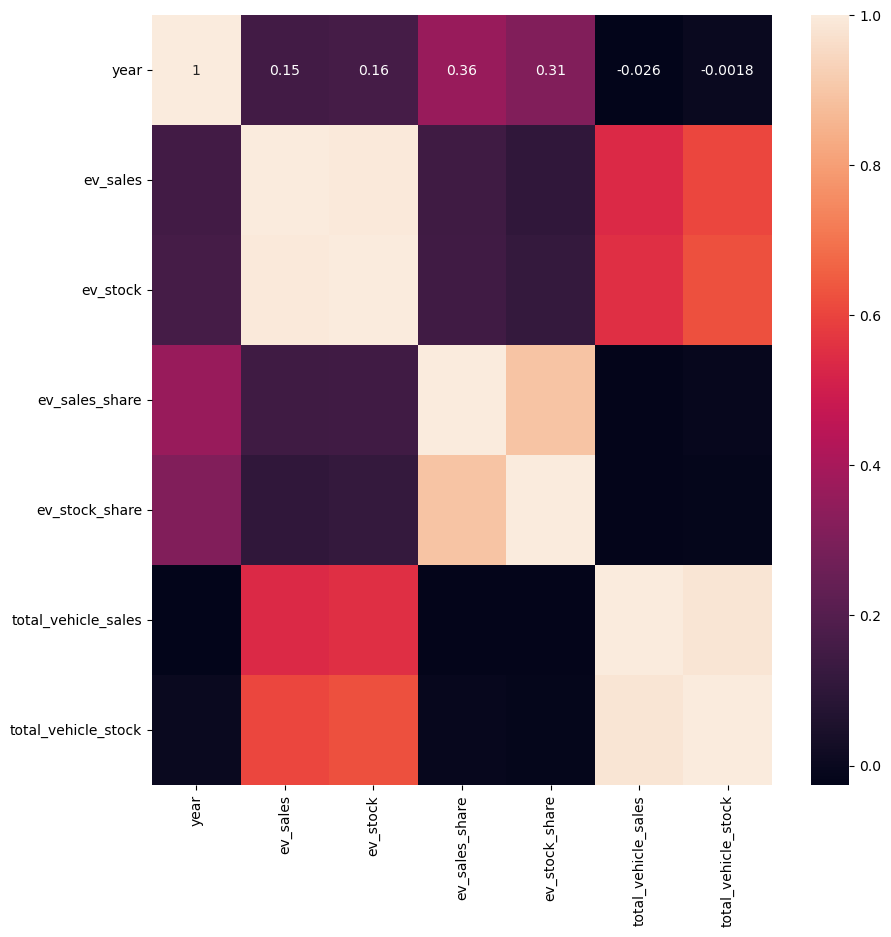

In [34]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_sales_stock_share = sns.heatmap(sales_stock_share_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [35]:
# Creating a subset of the imputed dataframe that only includes relevant columns
df_sales_stock_share_imputed.columns

Index(['region', 'vehicle_type', 'year', 'ev_sales', 'ev_stock',
       'ev_sales_share', 'ev_stock_share'],
      dtype='object')

In [36]:
sales_stock_share_sub_imp = df_sales_stock_share_imputed[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share']]

In [37]:
sales_stock_share_sub_imp

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share
0,2010,0,0,0.00000,0.00000
1,2011,49,49,0.00007,0.00000
2,2012,250,300,0.00030,0.00003
3,2013,290,590,0.00034,0.00005
4,2014,1320,1880,0.00160,0.00017
...,...,...,...,...,...
2335,2018,2286390,6034800,0.02149,0.00441
2336,2019,2259380,8334800,0.02315,0.00577
2337,2020,3164620,11478500,0.03635,0.00778
2338,2021,6754200,17754000,0.07327,0.01186


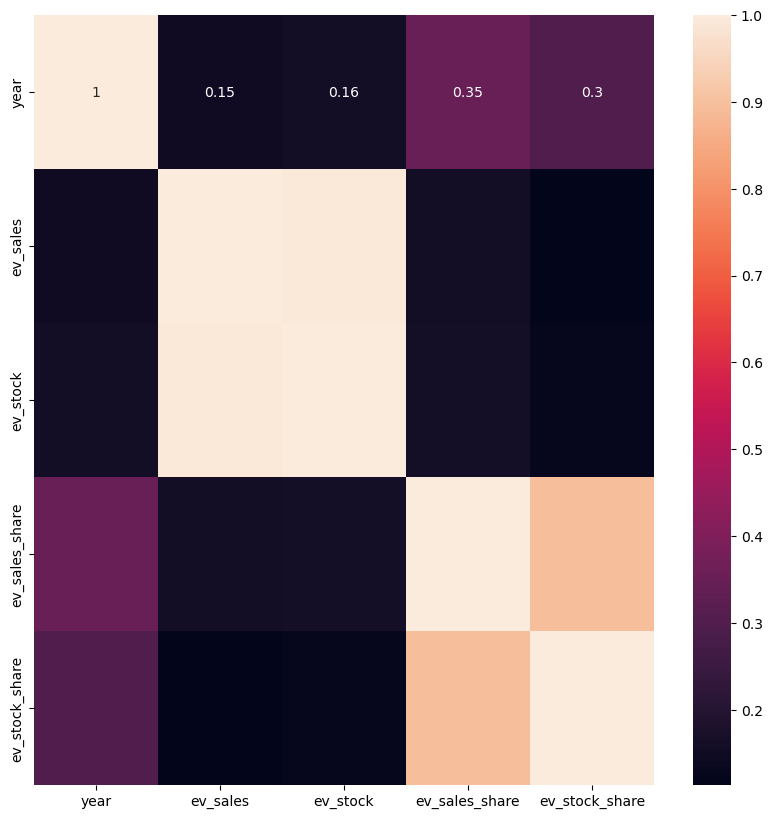

In [38]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_sales_stock_share_imp = sns.heatmap(sales_stock_share_sub_imp.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The key relationships to explore from the above correlation charts and heat maps are the relationships between ev_sales/ev_stock and ev_sales_share/ev_stock_share. These correlations are listed below. 

ev_sales and ev_sales_share:

- non-imputed correlation: 0.145109
- imputed correlation: 0.156027

ev_sales and ev_stock_share

- non-imputed correlation: 0.102568
- imputed correlation: 0.113072

ev_stock and ev_sales_share 

- non-imputed correlation: 0.147115
- imputed correlation: 0.158572	

ev_stock and ev_stock_share 

- non-imputed correlation: 0.115316	
- imputed correlation: 0.126133

ev_sales_share and ev_stock_share

- non-imputed correlation: 0.892217	
- imputed correlation: 0.895147

As is clear from the correlations, the relationship between the sales/stock data and share of sales/stock data is positive, but very weak. They all fall within the range of 0.1-0.16 which indicates a weak relationship. So it can be concluded that typically ev_sales, ev_stock, ev_sales_share, and ev_stock_share increase together, but the rate at which they increase is not at all consistent across the variables. This is a bit surprising as it seems like these variables would have a stronger relationship than this. This could be factor of ev_sales and ev_stock going up, but the share of sales and share of stock not going up as quickly because of offsetting growth in total, non-electric vehicles sales and stock. Or the opposite could be true, ev_sales and ev_stock increasing, but not by as much ev_sales_share and ev_stock_share because of slower growth in total non-electric vehicle sales/stock vs. growth in electric vehicle sales/stock. These relationships are explored further visually below. 

There is a very strong positive relationship between ev_sales_share and ev_stock_share, with a correlation efficient over 0.89. This is interesting as it shows that ev_sales_share and ev_stock_share both increase in very similar ways through out the data set. It is interesting that not only do total ev_sales and ev_stock have a strong relationship, but so too do ev_sales_share and ev_stock_share. The fact that both of these sets of variables have strong positive relationships, while the other variables listed above have weak relationships seems to support idea that electric vehicle sales and stock are closely related and tend to increase together, but that the relationship between sales and stock and share of sales and share of stock is not as strong, potentially because of changes in non-electric vehicle sales and stock causing fluctuations in the share of sales/share of stock variables. This relationship is explored further visually below.  

Also of note, which has been consistent in all steps of the analysis, is that the relationships are not significantly different across the imputed and non-imputed data sets. 


# Scatterplots for EV Sales/EV stock vs. EV Share of Sales/EV Share of Stock

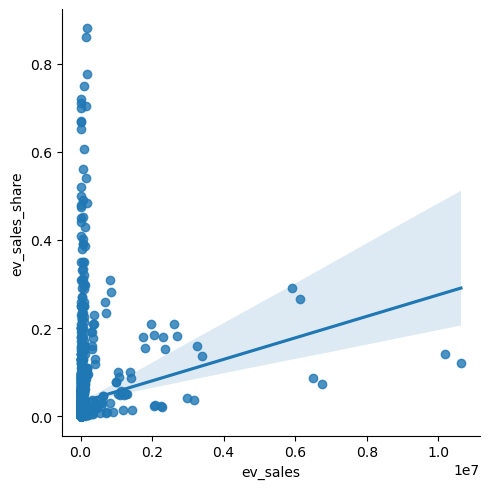

In [39]:
# scatterplots of ev_sales and ev_sales_share
sns.lmplot(x = 'ev_sales', y = 'ev_sales_share', data = df_sales_stock_share)

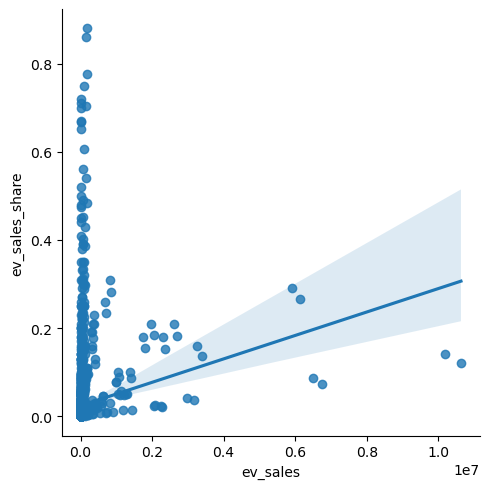

In [40]:
sns.lmplot(x = 'ev_sales', y = 'ev_sales_share', data = df_sales_stock_share_imputed)

- Looking at the results of the scatterplot above there appear to be a significant amount of values with a small amount of electric vehicle sales, but a large spread electric vehicle share of sales. Those are all of the data points clustered in a vertical straight line along the left side of the graph. 
- These points represent countries/regions where the amount of electric vehicles sold was low when compared to some of the other sales figures in the data set (most likely for countries with small populations vs. countries with large populations), but the electric vehicle share of total vehicle sales within that country was more significant.
- For example if a country with a small total population had a small amount of electric vehicle sales when comparing to other countries in the data set, but those sales made up 50% of total vehicle sales in the country, then that data point would be all the way to the left side of the graph but about half way up the y-axis.
- It seems as though these types of data points, with relatively small total sales but a large variance in the sales share, are what is driving the weak correlation in these variables. 
- Separate from the data points discussed above that are clustered vertically along the left side of the plot, there does seem to be a cluster of values that roughly follow the line of best fit. These are data points for countries that have fairly significant electric vehicle sales, and that seem to have anywhere from 5-30% electric vehicle share of total sales. These data points may be worth analyzing further later on in the analysis. 

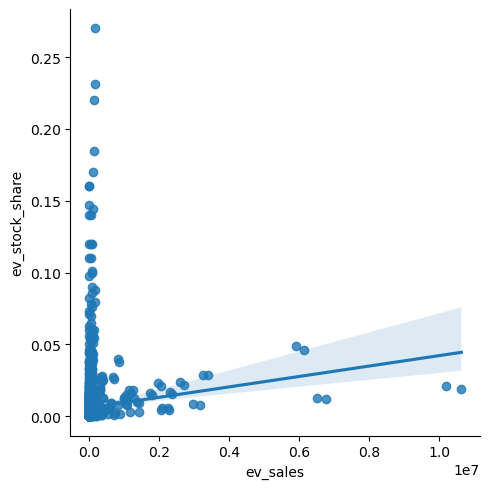

In [41]:
# scatterplots of ev_sales and ev_stock_share
sns.lmplot(x = 'ev_sales', y = 'ev_stock_share', data = df_sales_stock_share)

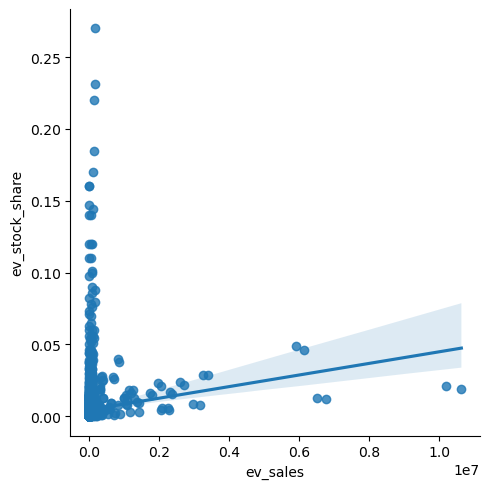

In [42]:
sns.lmplot(x = 'ev_sales', y = 'ev_stock_share', data = df_sales_stock_share_imputed)

- This scatterplot again compares ev_sales, but this time to ev_stock_share
- The plot looks very similar to the ev_sales vs. ev_sales_share plot with the large amount of data points clustered in a vertical line along the y-axis. 
- These points again represent the sales of countries with relatively small total ev sales, but more variance in the percent vehicle stock within the country that is electric. 
- This data pattern is again what is driving the low correlation between ev_sales and ev_stock_share
- Also similar to the prior plot, if the data points clustered along the y-axis are ignored, the data points for countries with more significant amounts of electric vehicle sales seem to follow the line of best fit fairly closely with ev_stock_share anywhere from 2-6%. These data points may be worth analyzing further later in the analysis. 

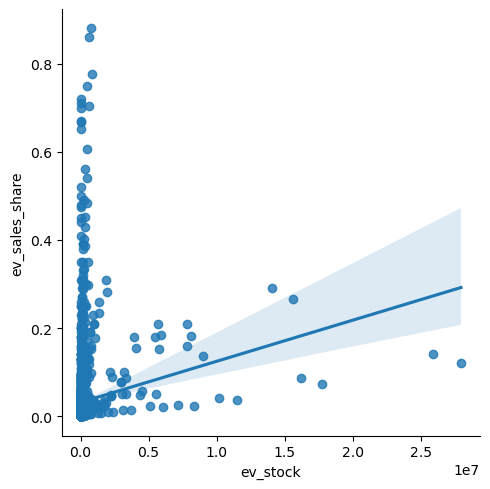

In [43]:
# scatterplots of ev_stock and ev_sales_share
sns.lmplot(x = 'ev_stock', y = 'ev_sales_share', data = df_sales_stock_share)

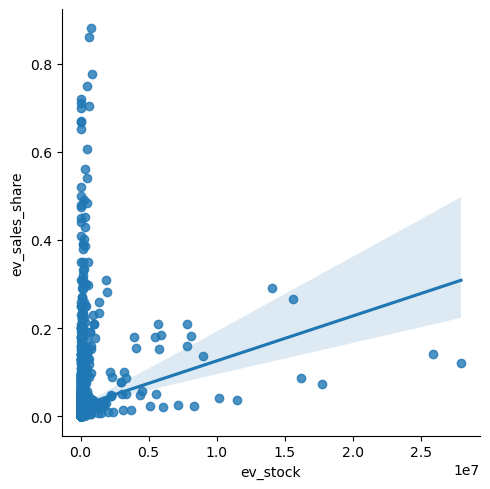

In [44]:
sns.lmplot(x = 'ev_stock', y = 'ev_sales_share', data = df_sales_stock_share_imputed)

- In this scatterplot the ev_stock and ev_sales_share data is plotted
- Again a similar pattern to the previous scatterplots emerges. It appears that there are a significant amount of data points where the country has relatively low electric vehicle stock compared to other countries in the data set, but then a large range in the electric vehicle share of sales. This pattern again drives the weak correlation between the variables. 
- Again if the data along the y--axis is ignored, there appears to be a group of data points that roughly follow the line of best fit with ev_sales_share somwhere between 5-30%. 

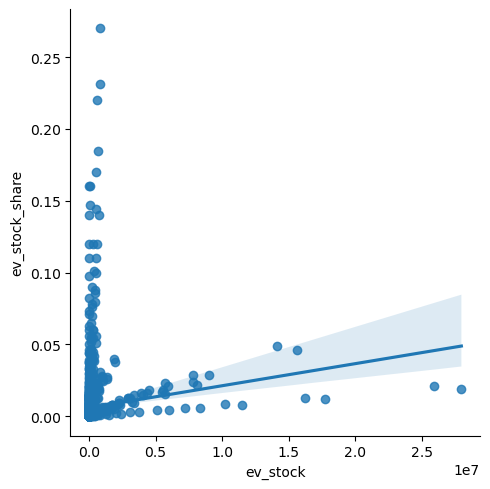

In [45]:
# scatterplots of ev_stock and ev_stock_share
sns.lmplot(x = 'ev_stock', y = 'ev_stock_share', data = df_sales_stock_share)

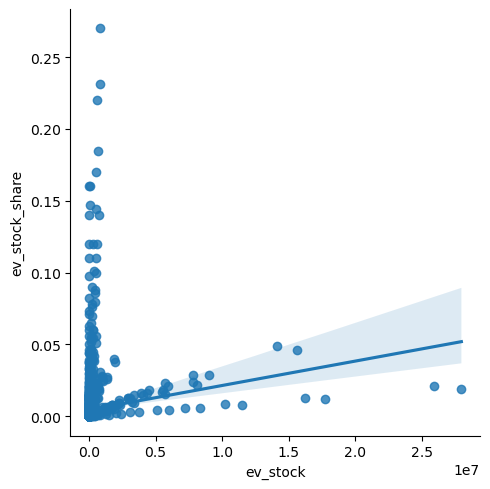

In [46]:
sns.lmplot(x = 'ev_stock', y = 'ev_stock_share', data = df_sales_stock_share_imputed)

- In this scatterplot ev_stock and ev_stock_share are plotted. 
- Again there appears to be siginificant data clustered along the y-axis which represents countries with relatively low electric vehicle stock but a large range of ev_stock_share_values. These data points are causing the weak correlation. 
- Again if you ignore these data points there do appear to be a group of countries who's data closely follows the line of best fit with ev_stock_share around 2-6%. 

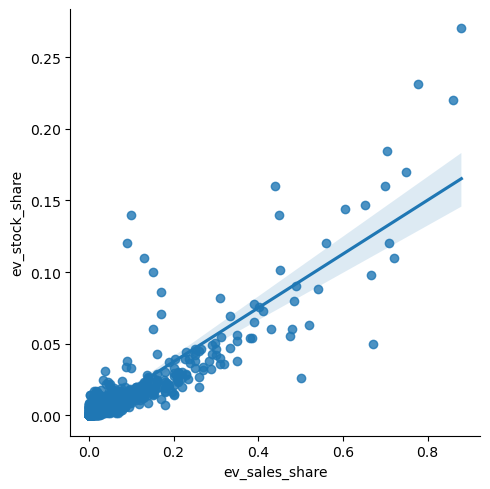

In [47]:
# scatterplots of ev_sales_share and ev_stock_share
sns.lmplot(x = 'ev_sales_share', y = 'ev_stock_share', data = df_sales_stock_share)

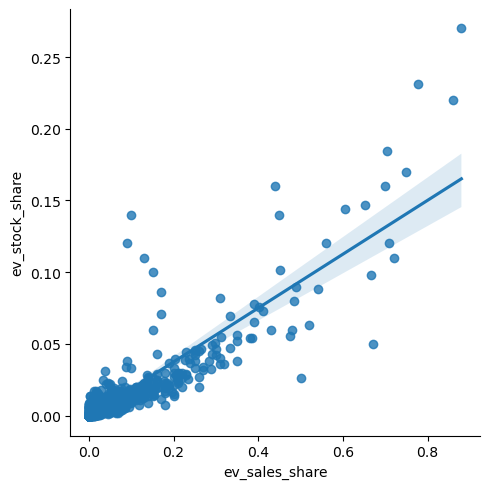

In [48]:
sns.lmplot(x = 'ev_sales_share', y = 'ev_stock_share', data = df_sales_stock_share_imputed)

- In this scatterplot the ev_sales_share and ev_stock_share are plotted
- These variables had a very strong positive relationship, so it is unsurprising to see the scatterplit with a majority of the data points close to the line of best fit. 
- In general, ev_sales_share and ev_stock_share increase together. 
- There are definitely some outliers who do not align closely with the line of best fit. It seems like most of the outliers are above the line of best fit, which would indicate countries with relatively high ev_stock_share, but low ev_sales_share. There are also some countries that seem to have relatively high ev_sales_share but low ev_stock_share (though there are less of these outliers than the first kind). These data points are relevant to one of the questions asked in the the analysis ("What is the relationship between growth in electric sales and electric stock like? Are there any countries/regions where the ratio of sales vs. available stock is significantly different than average?) Further analysis of these outliers will be necessary to answer these questions. 
- Overall though, the the relationship betweem these variables is strong and can be used in later analysis. 

# Pair Plots for EV Sales/EV stock vs. EV Share of Sales/EV Share of Stock

In [56]:
# creating subsets to be used in pair plots for the sales/stock/share data sets 

sales_stock_share_sub2 = df_sales_stock_share[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share']]

In [57]:
sales_stock_share_imp_sub2 = df_sales_stock_share_imputed[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share']]

In [58]:
sales_stock_share_sub2

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share
0,2011,49,49,0.00007,0.00000
1,2012,250,300,0.00030,0.00003
2,2013,290,590,0.00034,0.00005
3,2014,1320,1880,0.00160,0.00017
4,2015,1760,3600,0.00200,0.00032
...,...,...,...,...,...
1768,2018,2286390,6034800,0.02149,0.00441
1769,2019,2259380,8334800,0.02315,0.00577
1770,2020,3164620,11478500,0.03635,0.00778
1771,2021,6754200,17754000,0.07327,0.01186


In [59]:
sales_stock_share_imp_sub2

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share
0,2010,0,0,0.00000,0.00000
1,2011,49,49,0.00007,0.00000
2,2012,250,300,0.00030,0.00003
3,2013,290,590,0.00034,0.00005
4,2014,1320,1880,0.00160,0.00017
...,...,...,...,...,...
2335,2018,2286390,6034800,0.02149,0.00441
2336,2019,2259380,8334800,0.02315,0.00577
2337,2020,3164620,11478500,0.03635,0.00778
2338,2021,6754200,17754000,0.07327,0.01186


/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

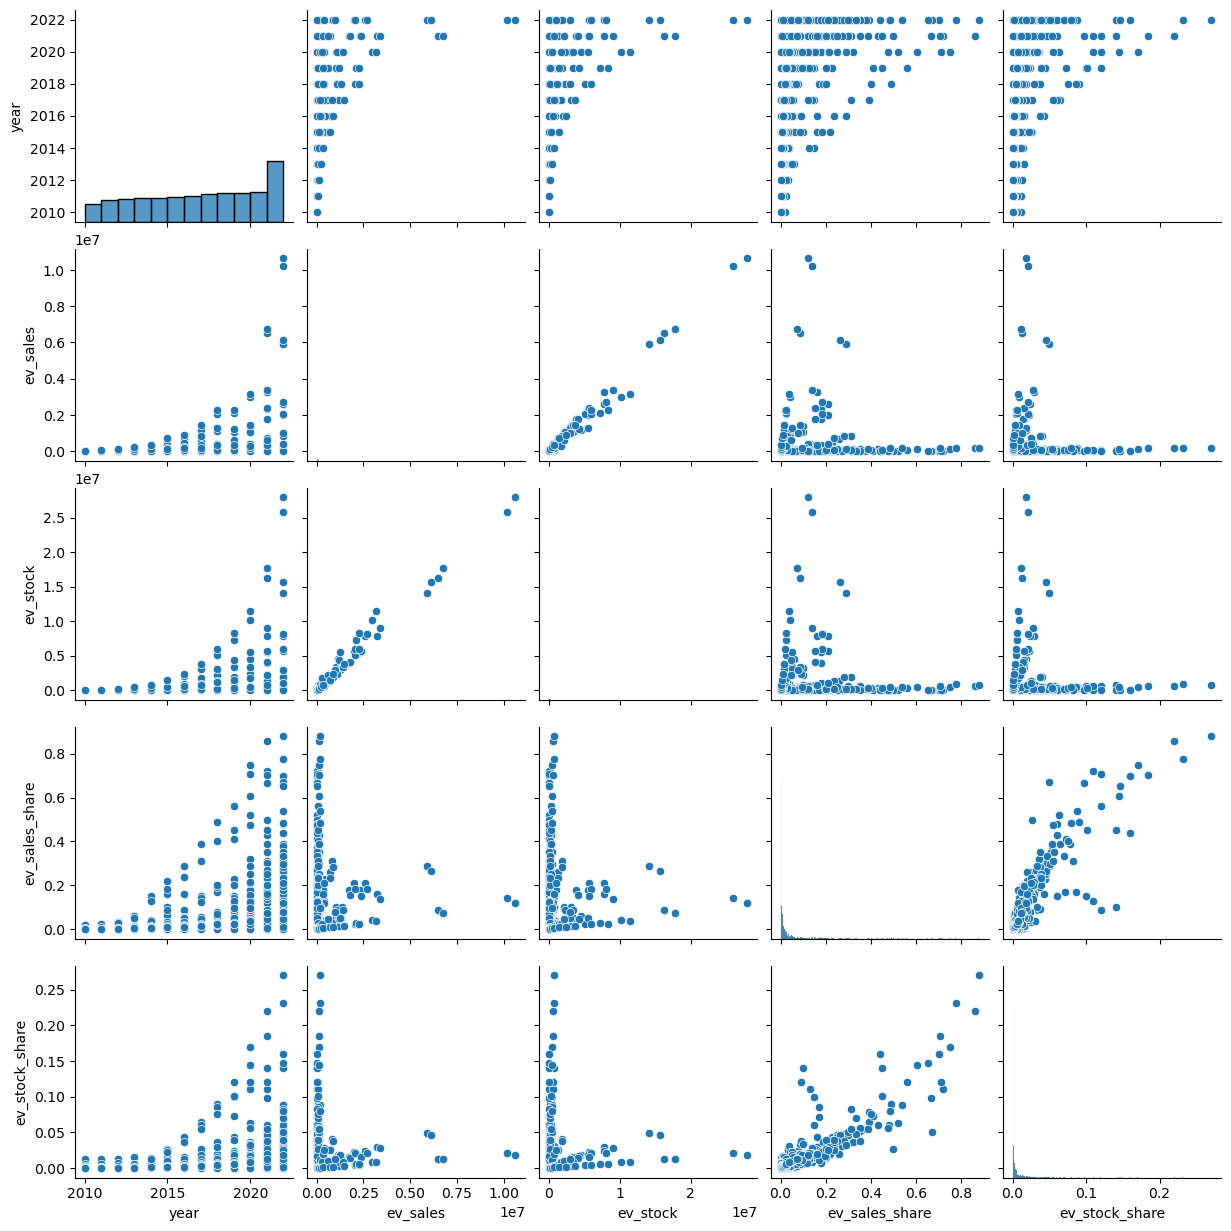

In [60]:
# creating a pair plot using the data subsets 
sales_stock_share_sub2_pair = sns.pairplot(sales_stock_share_sub2)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

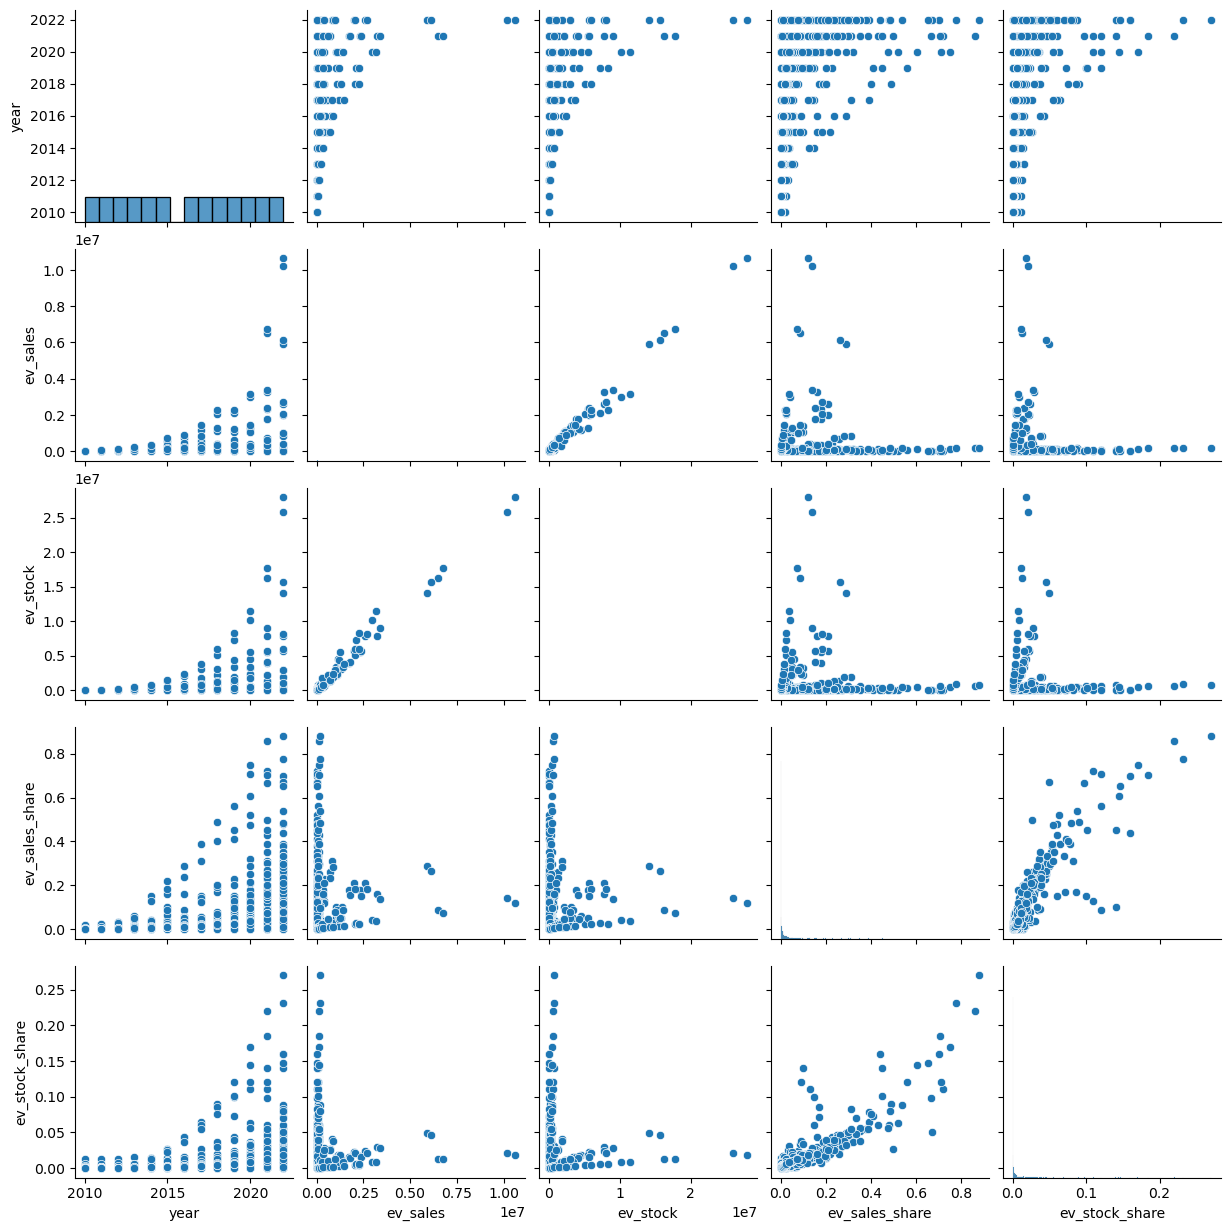

In [53]:
sales_stock_share_imp_sub2_pair = sns.pairplot(sales_stock_share_imp_sub2)

- When looking at the pair plots, the only plot that provides new information are the ones where the different variables and year are plotted. 
- It is clear from looking at the plots where year and any of the variables are plotted, that over the period of 2010-2022, ev_sales, ev_stock, ev_sales_share, and ev_stock_share have all been generally increasing every year. You can tell from the shape of the plots with the largest data points for each year consistently increasing compared to the previous year. 

# Analysis of Correlation between EV Sales & EV Stock vs. Publicly Available Charger Count

The next step in the exploratory analysis will be to move on to the the df_total/df_total_imputed data sets that contain data on ev_sales, ev_stock, ev_sales_share, ev_stock_share, and charger_count. A majority of the relationships between these variables have already been analyzed, so the main focus when looking at this data set is the relationship between the sales and stock data and the number of charging stations.

In [72]:
df_total.corr(numeric_only = True)

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock,charger_count
year,1.000000,0.202482,0.211616,0.456427,0.382032,0.001159,0.030396,0.202878
ev_sales,0.202482,1.000000,0.992695,0.111905,0.097692,0.549174,0.612699,0.979575
ev_stock,0.211616,0.992695,1.000000,0.112647,0.105369,0.564900,0.632954,0.990523
ev_sales_share,0.456427,0.111905,0.112647,1.000000,0.946740,-0.052742,-0.043201,0.096247
ev_stock_share,0.382032,0.097692,0.105369,0.946740,1.000000,-0.035749,-0.029978,0.090434
total_vehicle_sales,0.001159,0.549174,0.564900,-0.052742,-0.035749,1.000000,0.988599,0.565117
total_vehicle_stock,0.030396,0.612699,0.632954,-0.043201,-0.029978,0.988599,1.000000,0.628202
charger_count,0.202878,0.979575,0.990523,0.096247,0.090434,0.565117,0.628202,1.000000


In [73]:
df_total_imputed.corr(numeric_only = True)

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count
year,1.000000,0.203823,0.212916,0.458838,0.384118,0.204408
ev_sales,0.203823,1.000000,0.992702,0.114033,0.099516,0.979597
ev_stock,0.212916,0.992702,1.000000,0.114854,0.107240,0.990534
ev_sales_share,0.458838,0.114033,0.114854,1.000000,0.946907,0.098487
ev_stock_share,0.384118,0.099516,0.107240,0.946907,1.000000,0.092323
charger_count,0.204408,0.979597,0.990534,0.098487,0.092323,1.000000


In [74]:
total_sub = df_total[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share', 'total_vehicle_sales', 'total_vehicle_stock', 'charger_count']]

In [75]:
total_sub

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,total_vehicle_sales,total_vehicle_stock,charger_count
0,2011,49,49,0.00007,0.00000,753846,10652174,0.0
1,2012,250,300,0.00030,0.00003,833333,10714286,0.0
2,2013,290,590,0.00034,0.00005,852941,10925926,0.0
3,2014,1320,1880,0.00160,0.00017,825000,11058823,0.0
4,2015,1760,3600,0.00200,0.00032,880000,11249999,0.0
...,...,...,...,...,...,...,...,...
398,2018,2286390,6034800,0.02149,0.00441,106369705,1369447799,533034.3
399,2019,2259380,8334800,0.02315,0.00577,97603941,1443378254,871450.3
400,2020,3164620,11478500,0.03635,0.00778,87067888,1474722799,1260260.2
401,2021,6754200,17754000,0.07327,0.01186,92184336,1496758569,1781437.0


In [76]:
total_sub_imp = df_total_imputed[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share', 'charger_count']]

In [77]:
total_sub_imp

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count
0,2010,0,0,0.00000,0.00000,0.0
1,2011,49,49,0.00007,0.00000,0.0
2,2012,250,300,0.00030,0.00003,0.0
3,2013,290,590,0.00034,0.00005,0.0
4,2014,1320,1880,0.00160,0.00017,0.0
...,...,...,...,...,...,...
411,2018,2286390,6034800,0.02149,0.00441,533034.3
412,2019,2259380,8334800,0.02315,0.00577,871450.3
413,2020,3164620,11478500,0.03635,0.00778,1260260.2
414,2021,6754200,17754000,0.07327,0.01186,1781437.0


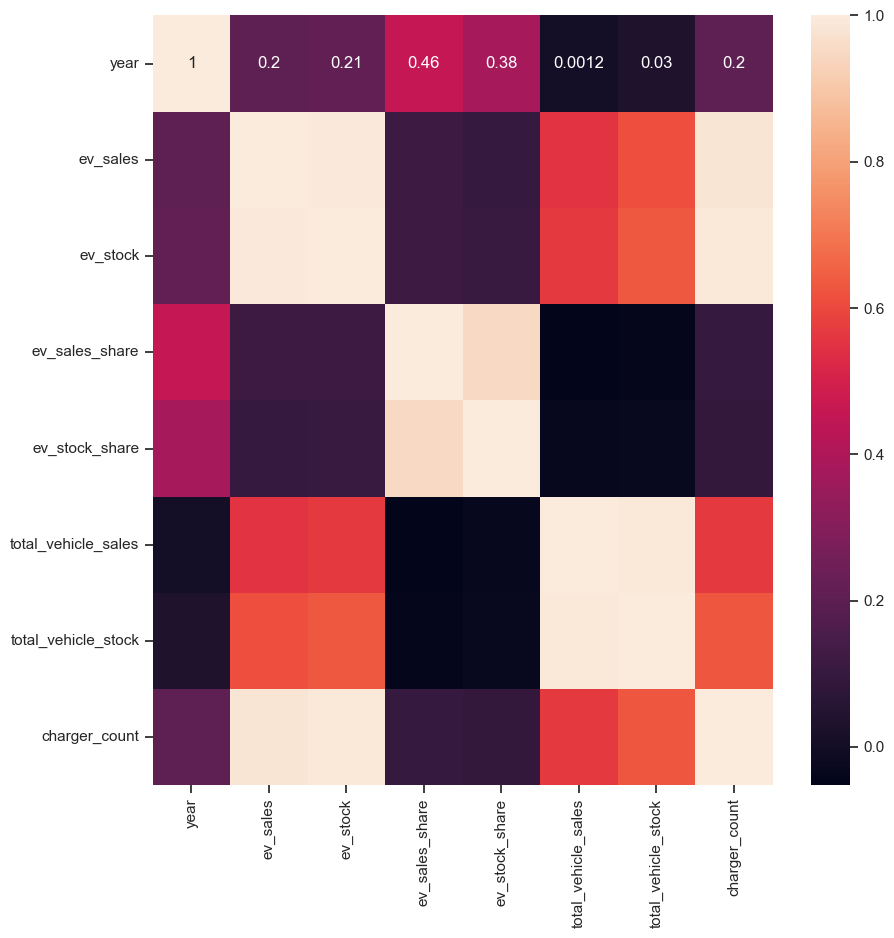

In [78]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_total = sns.heatmap(total_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

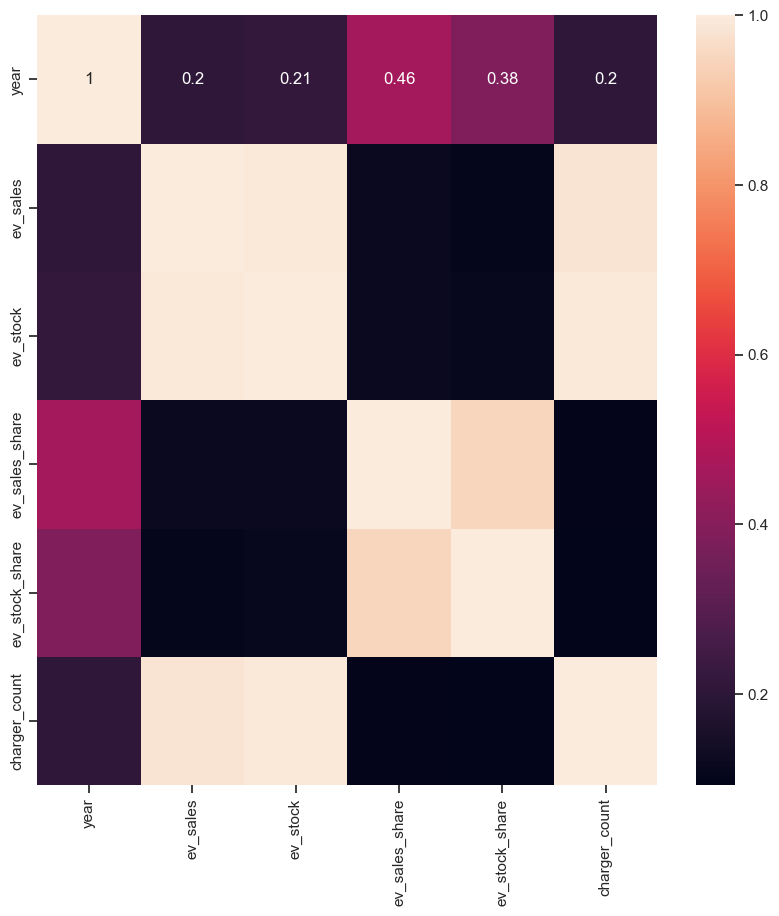

In [79]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_total_imp = sns.heatmap(total_sub_imp.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Based on the results of the correlation calculations, these are the correlations between charget_count and the sales/stock variables 

charger_count and ev_sales
- imputed correlation 0.979597 
- non-imputed correlation 0.979575

charger_count and ev_stock 
- imputed correlation 0.990534	
- non-imputed correlation 0.990523	

charger_count and ev_sales_share
- imputed correlation 0.098487
- non-imputed correlation 0.096247

charger_count and ev_stock_share 
- imputed correlation 0.092323	
- non-imputed correlation 0.090434	

Based on these results, there is a very strong, positive relationship between number of charging stations and electric vehicle sales and stock. Both relationships are above 0.97 correlation, with the relationship between chargers and ev_stock even stronger at over 0.99. 

Again, similar to earlier, the relationship between charger_count and ev_sales_share and ev_stock_share is positive, but is very weak. 

All of these relationships will be analyzed further below. 

# Pair Plots for EV Sales, EV Stock, & Publicly Available Charging Station Data

In [81]:
# first step will be to create a pair plot the the total data set to get a high level view of the relationships
# between the variables. 
total_sub2 = df_total[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share','charger_count']]

In [82]:
total_sub_imp2 = df_total_imputed[['year', 'ev_sales', 'ev_stock', 'ev_sales_share','ev_stock_share','charger_count']]

In [83]:
total_sub2

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count
0,2011,49,49,0.00007,0.00000,0.0
1,2012,250,300,0.00030,0.00003,0.0
2,2013,290,590,0.00034,0.00005,0.0
3,2014,1320,1880,0.00160,0.00017,0.0
4,2015,1760,3600,0.00200,0.00032,0.0
...,...,...,...,...,...,...
398,2018,2286390,6034800,0.02149,0.00441,533034.3
399,2019,2259380,8334800,0.02315,0.00577,871450.3
400,2020,3164620,11478500,0.03635,0.00778,1260260.2
401,2021,6754200,17754000,0.07327,0.01186,1781437.0


In [84]:
total_sub_imp2

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count
0,2010,0,0,0.00000,0.00000,0.0
1,2011,49,49,0.00007,0.00000,0.0
2,2012,250,300,0.00030,0.00003,0.0
3,2013,290,590,0.00034,0.00005,0.0
4,2014,1320,1880,0.00160,0.00017,0.0
...,...,...,...,...,...,...
411,2018,2286390,6034800,0.02149,0.00441,533034.3
412,2019,2259380,8334800,0.02315,0.00577,871450.3
413,2020,3164620,11478500,0.03635,0.00778,1260260.2
414,2021,6754200,17754000,0.07327,0.01186,1781437.0


/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

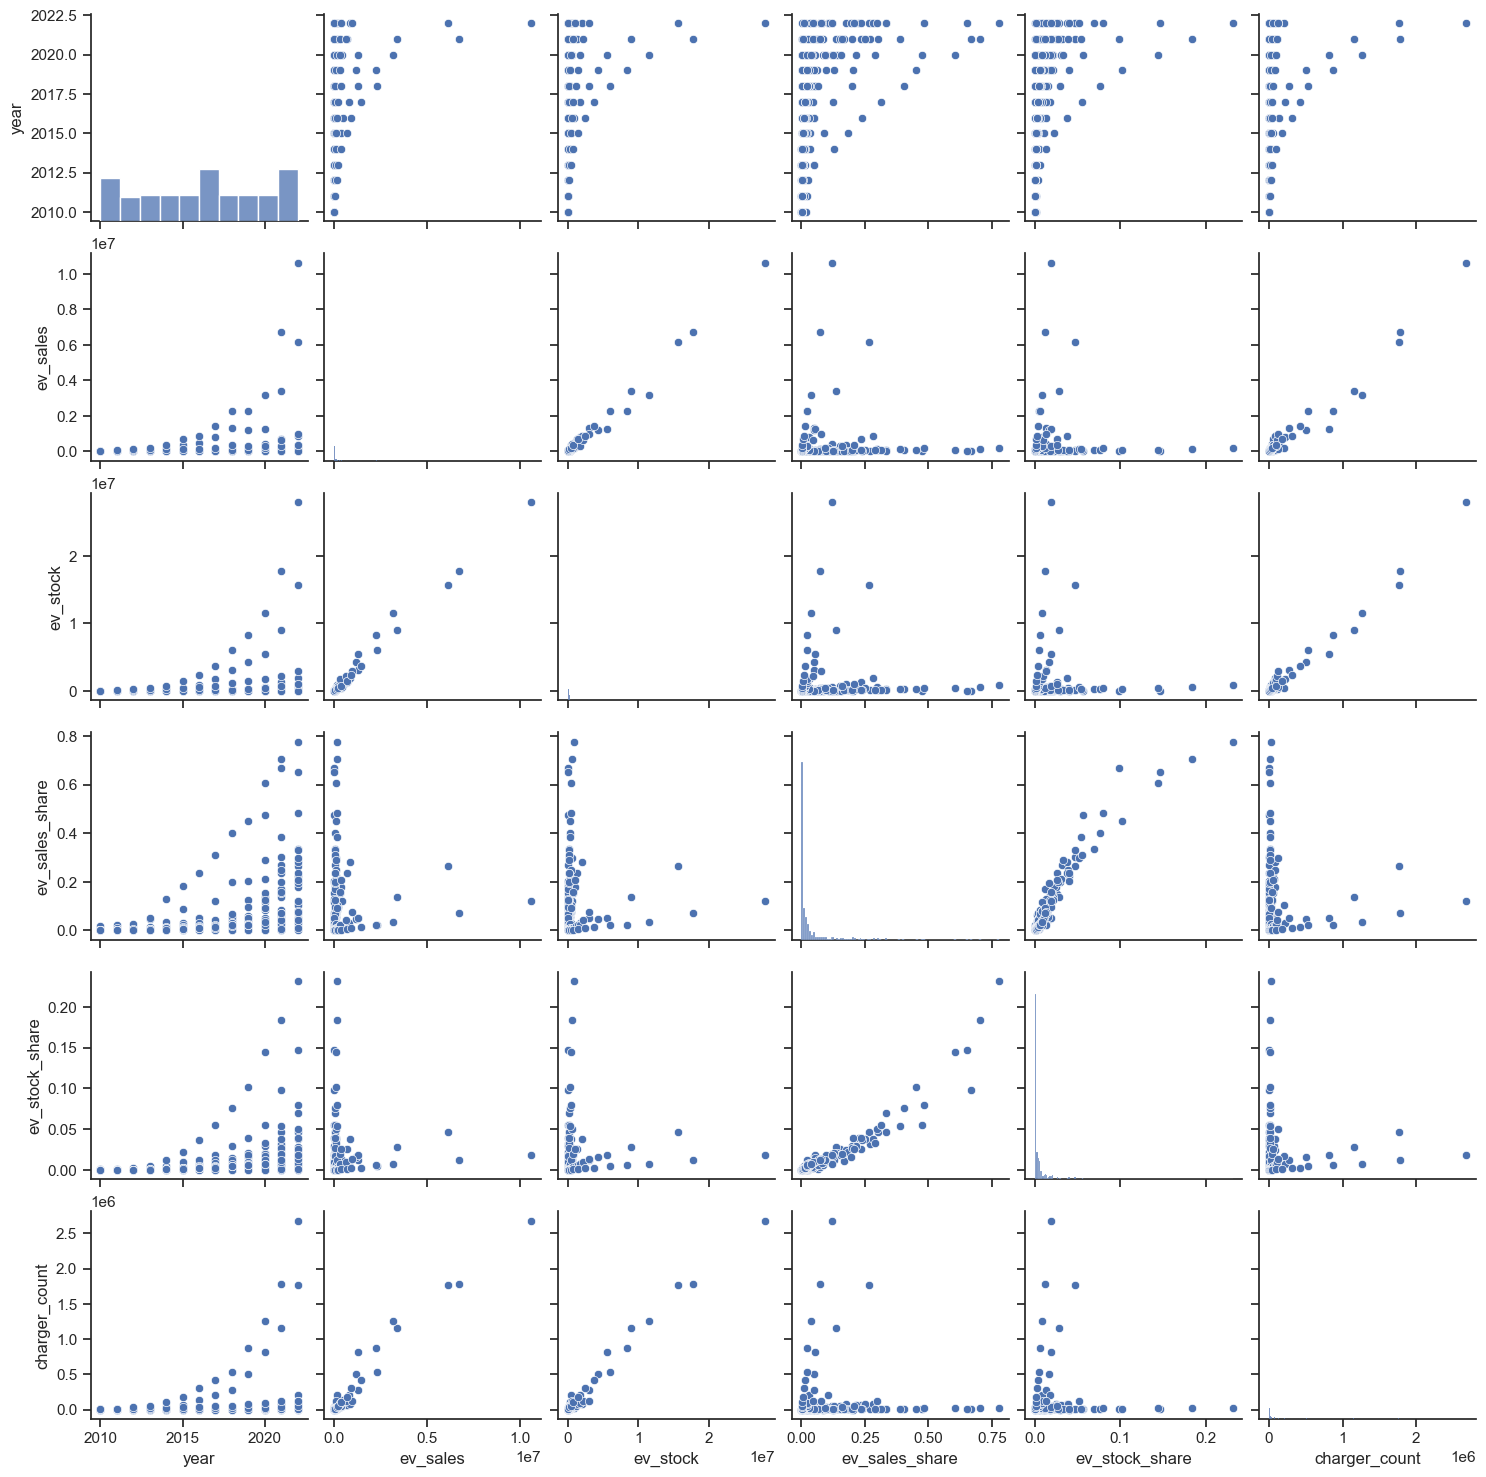

In [85]:
# creating a pair plot using the data subsets 
total_sub2_pair = sns.pairplot(total_sub2)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

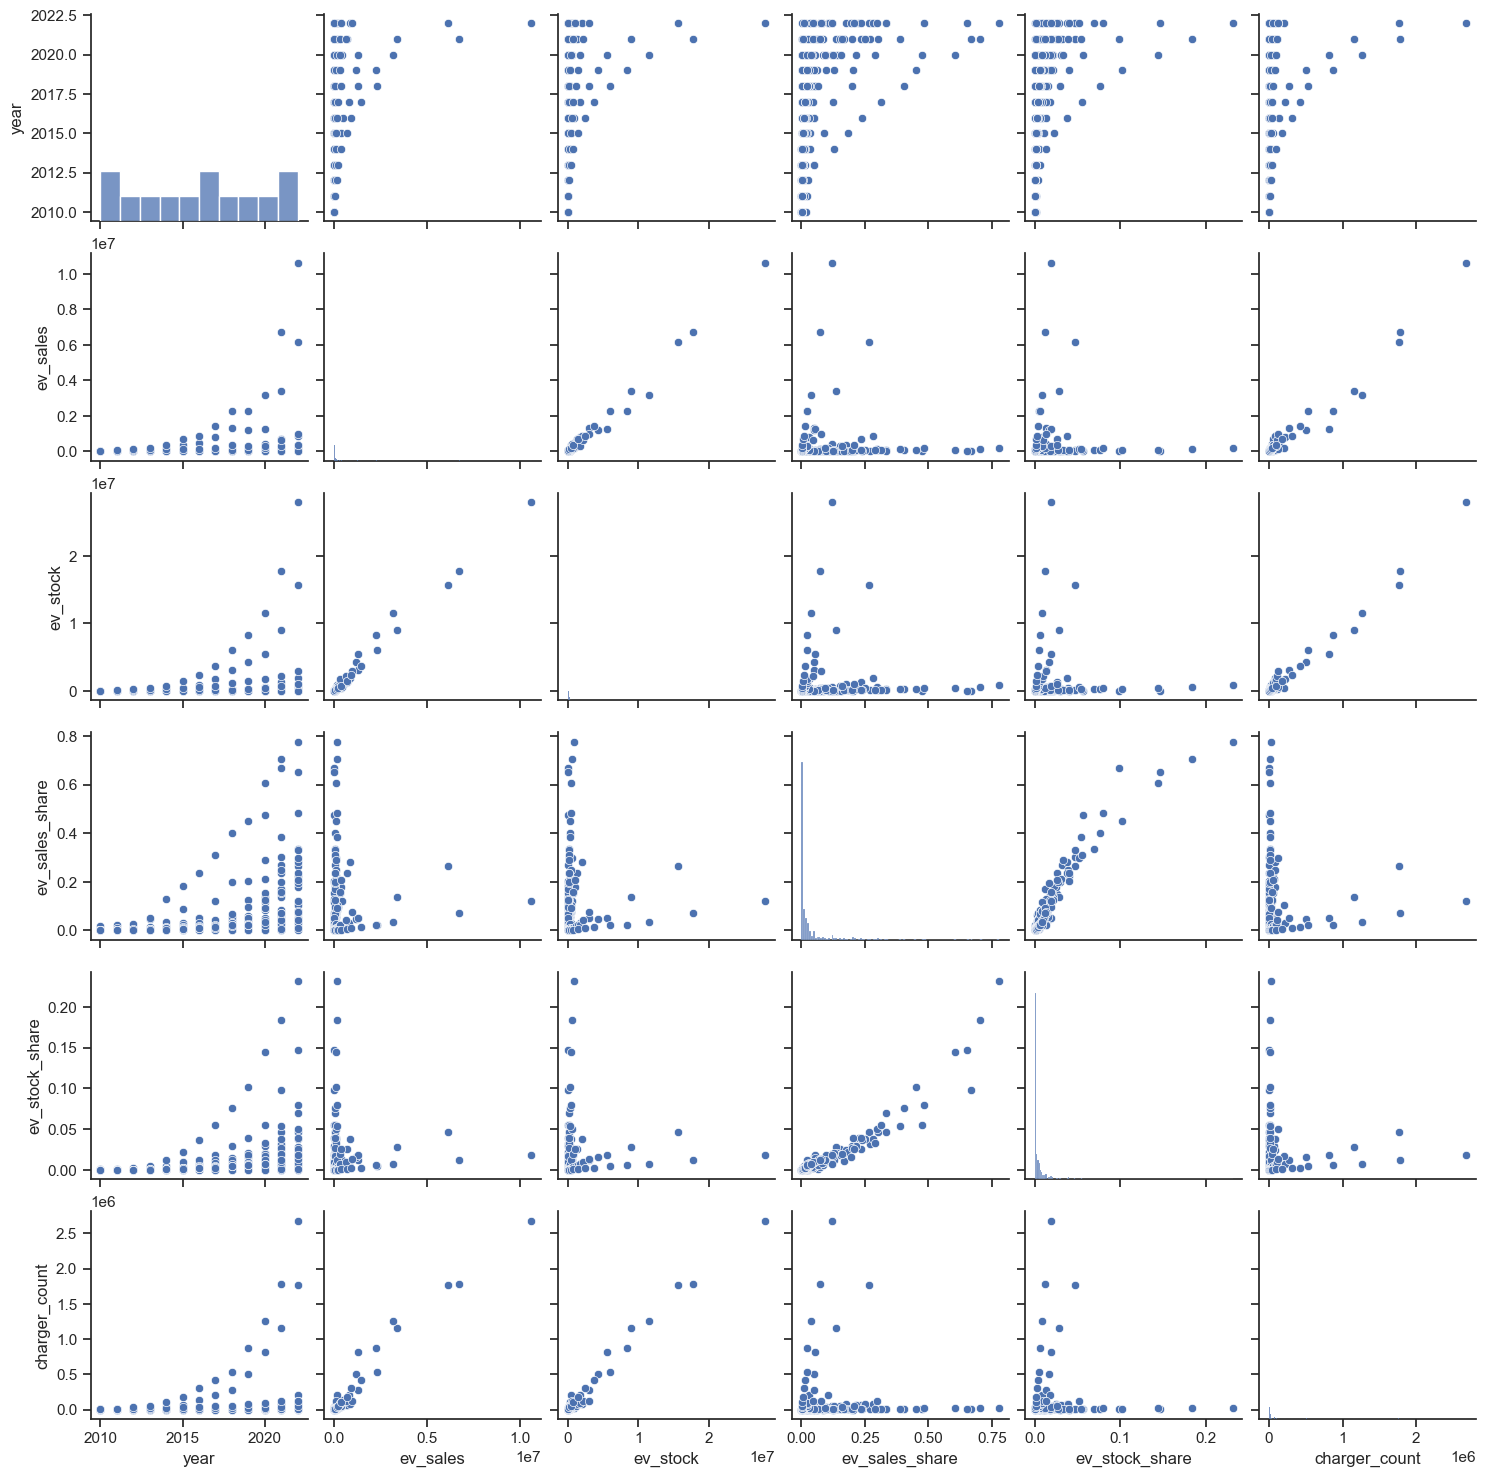

In [86]:
# creating a pair plot using the data subsets 
total_sub_imp2_pair = sns.pairplot(total_sub_imp2)

Based on the above pair plot, it looks as though there are some interesting relationships between charger_count and the sales and stock variables. Below are the scatterplots to explore these relationships

# Scatterplots for Publicly Available Charger Count, EV Sales, and EV Stock data

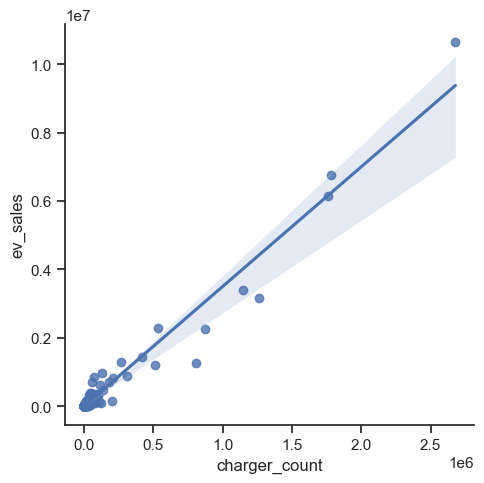

In [87]:
sns.lmplot(x = 'charger_count', y = 'ev_sales', data = df_total)

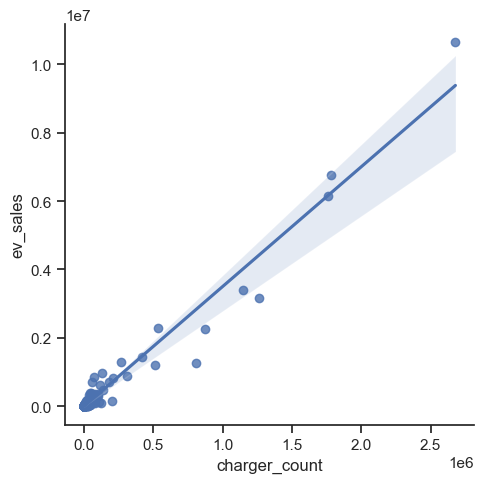

In [88]:
sns.lmplot(x = 'charger_count', y = 'ev_sales', data = df_total_imputed)

- There is a clear strong, positive, linear relationship between EV_sales and charger_count as expected 
- In general as EV_sales increase so too do the number of chargers in that country/region 
- There do not appear to be significant outliers in on plot which would indicate a country/region with a significantly different balance of vehicle sales vs. available chargers compared to the average 
- it will be interesting to see how these variables change over the time period of the data set when time series analysis is applied to the data set 

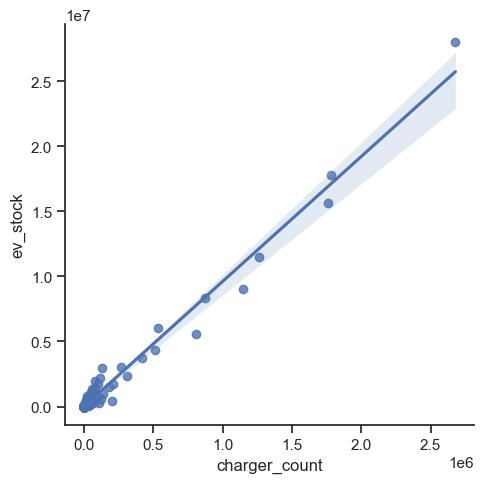

In [89]:
sns.lmplot(x = 'charger_count', y = 'ev_stock', data = df_total)

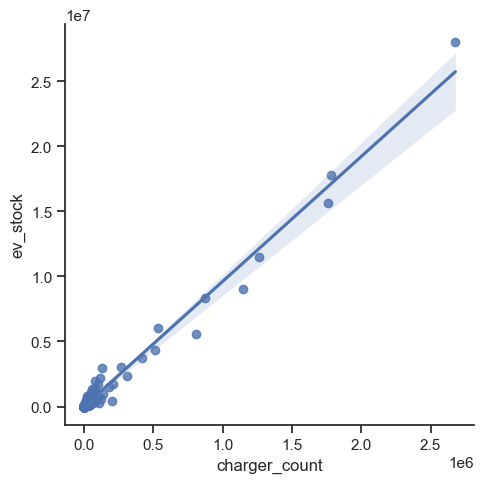

In [90]:
sns.lmplot(x = 'charger_count', y = 'ev_stock', data = df_total_imputed)

- Similar to ev_sales and charger_count, ev_stock and charger_count have a very strong, positive, linear relationship. A ev_stock increases, most of the time so too does available chargers. 
- Again no significant outliers. 

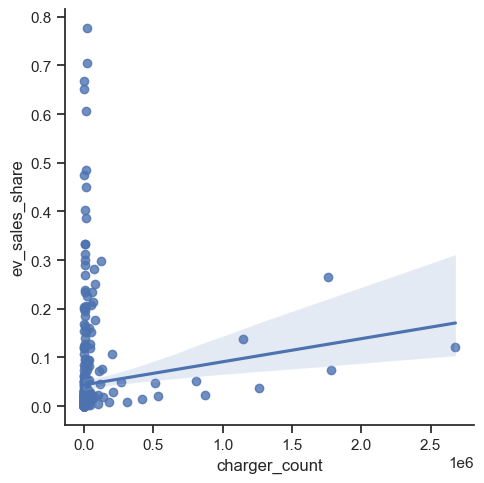

In [91]:
sns.lmplot(x = 'charger_count', y = 'ev_sales_share', data = df_total)

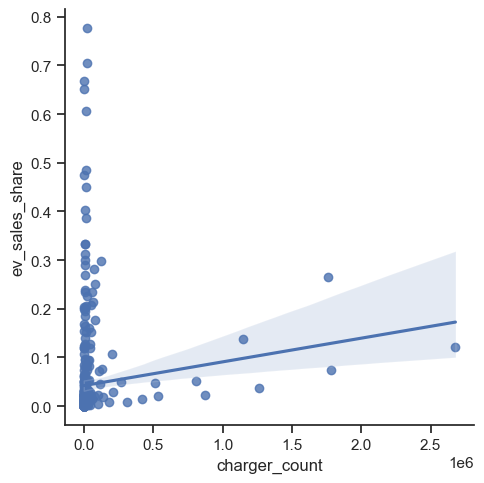

In [92]:
sns.lmplot(x = 'charger_count', y = 'ev_sales_share', data = df_total_imputed)

- When looking at the relationship between charger_count and ev_sales_share it looks as though the plot has similar characteristics to the sales vs. sales share and stock vs. stock share relationship. 
- A significant amount of of data points exist with either zero, or very few chargers, but within that country/region there was a wide range of ev_sales_share. A small country with very few publicly avaiable chargers could have electric vehicles make up 70% of all vehicles sold in the country, which would be a data point all the way to the left side of the plot but almost all the way at the top of the y-axis. These data points are again causing the weak correlation.
- Another interesting characteristic is for the data points that represent countries/regions with more significant amount of chargers available (more towards the right side of the plot), the data points do seem to roughly follow the line of best fit. 

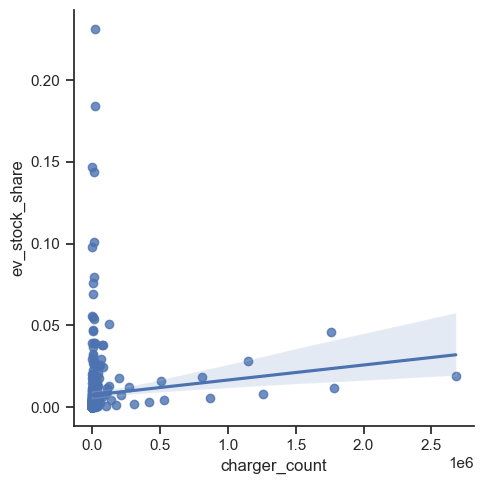

In [93]:
sns.lmplot(x = 'charger_count', y = 'ev_stock_share', data = df_total)

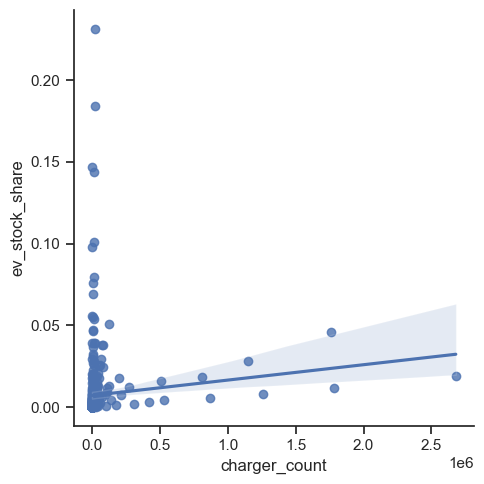

In [94]:
sns.lmplot(x = 'charger_count', y = 'ev_stock_share', data = df_total_imputed)

- Similar relationship to charger_count and ev_sales_share with a significant amount of data points for countrie/regions with very little publicly available chargers but a wide range of ev_stock_share (all data points along the left side of the plot)
- Again, if data points for countries with zero or very few chargers are exluded, the data points seem to follow the line of best fit fairly closely. 

Based on the above scatterplots, it is clear there is a very strong relationship between charger_count and ev_sales and ev_stock. This will definitely be explored further in later analyses. There appears to potentially be a relationship between charger count and ev_sales_share/ev_stock_share, but only when excluding the data points for countries/regions with zero or very few chargers. 

# Catplots of relationship between EV Sales & EV Stock vs. Publicly Available Charger Count

The final visualizations that will be generated for the exploratory analysis are two category plots that look at the relationship between charger_count and ev_sales and charger_count and ev_stock

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ev_sales', ylabel='Count'>

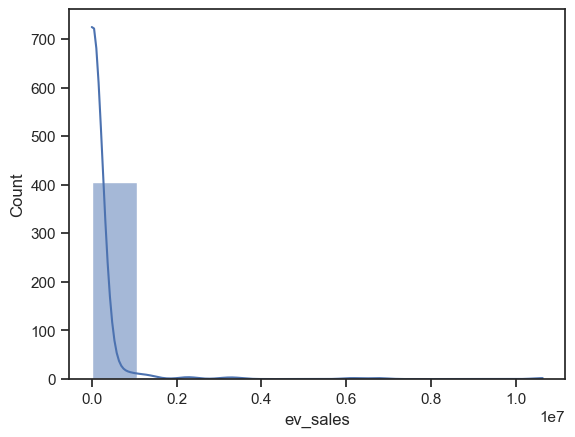

In [98]:
sns.histplot(df_total_imputed['ev_sales'], bins = 10, kde = True)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ev_stock', ylabel='Count'>

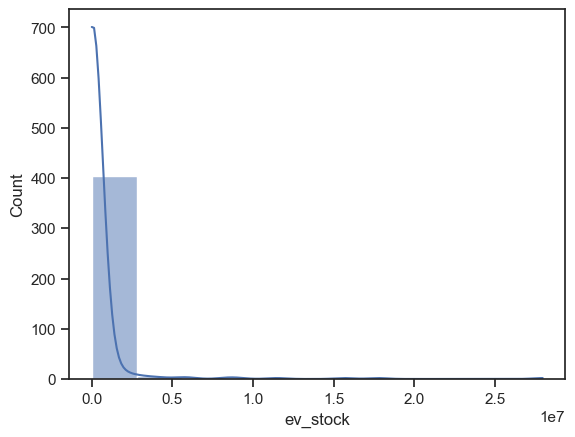

In [99]:
sns.histplot(df_total_imputed['ev_stock'], bins = 10, kde = True)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='charger_count', ylabel='Count'>

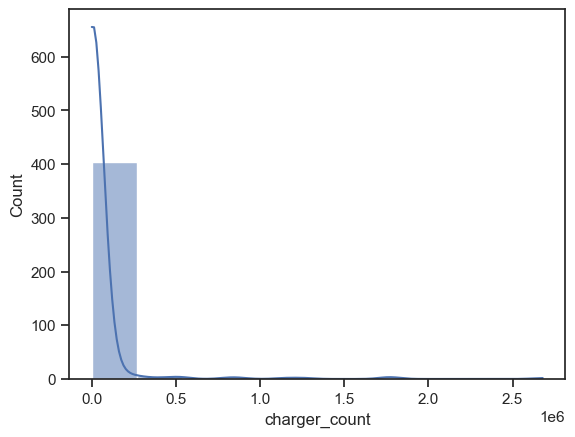

In [100]:
sns.histplot(df_total_imputed['charger_count'], bins = 10, kde = True)

None of the histograms are especially helpful because there are so many data points clusterd at or near zero in the data set for each variable. 

Based on work done in Excel outside this script, the following categories will be used for grouping the variables 

ev_sales
- Less than 10k sales - Low Sales
- 10k or more but less than 75k sales - Medium Sales
- 75k or more sales - High Sales

ev_stock 
- Less than 10k stock - Low Stock
- 10k or more but less than 100k stock - Medium Stock
- 100k or more stock - High Stock

In [118]:
df_total_imputed.loc[df_total_imputed['ev_sales'] < 10000, 'sales_category'] = 'Low sales'

In [119]:
df_total_imputed.loc[(df_total_imputed['ev_sales'] >= 10000) & (df_total_imputed['ev_sales'] < 75000), 'sales_category'] = 'Medium Sales'

In [120]:
df_total_imputed.loc[df_total_imputed['ev_sales'] >= 75000, 'sales_category'] = 'High sales'

In [121]:
df_total_imputed['sales_category'].value_counts(dropna = False)

sales_category
Low sales       254
Medium Sales    102
High sales       60
Name: count, dtype: int64

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

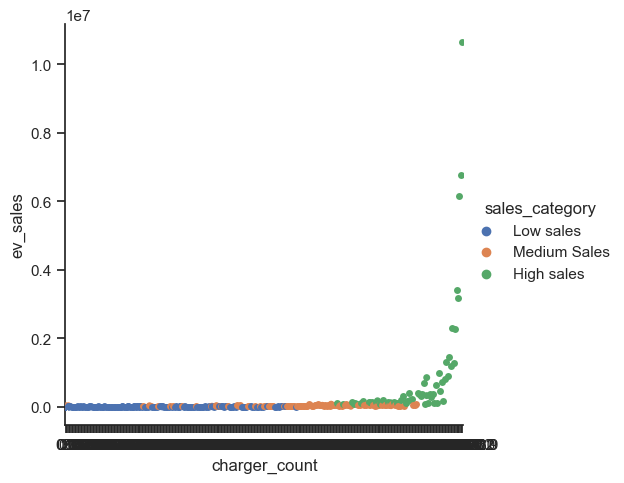

In [122]:
sns.set(style="ticks")
g = sns.catplot(x="charger_count", y="ev_sales", hue="sales_category", data=df_total_imputed)

While it is a bit hard to interpret due to the signifcant number of data points in the plot, it is clear that a majority of the blue dots, which correspoind to countries with low ev_sales are towards the left side of the plot, meaning also less chargers. More towards the middle of the plot, a majority of the data points are orange, which indicates that for countries with a medium amount of sales, they also tend to have a medium amount of chargers. Finally once you get to the far right side of the plot, where the data points correspond to countries with a lot of chargers, almost all of the data points are green meaning there are also high ev_sales in those countries.

There is some overlap between the sales categories (blue and orange mixing, and orange and green mixing) but the distribution between each category is clear. 

Next the same type of catplot will be used to plot the relationship between charger_count and ev_stock

In [133]:
df_total_imputed.loc[df_total_imputed['ev_stock'] < 10000, 'stock_category'] = 'Low stock'

In [134]:
df_total_imputed.loc[(df_total_imputed['ev_stock'] >= 10000) & (df_total_imputed['ev_stock'] < 100000), 'stock_category'] = 'Medium Stock'

In [135]:
df_total_imputed.loc[df_total_imputed['ev_stock'] >= 100000, 'stock_category'] = 'High stock'

In [136]:
df_total_imputed['stock_category'].value_counts(dropna = False)

stock_category
Low stock       206
Medium Stock    109
High stock      101
Name: count, dtype: int64

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

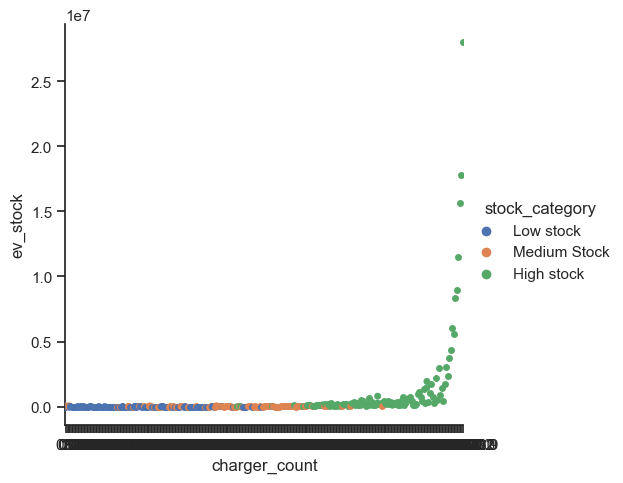

In [126]:
sns.set(style="ticks")
g = sns.catplot(x="charger_count", y="ev_stock", hue="stock_category", data=df_total_imputed)

Again the catplot shows that for countries with low ev_stock they also tend to have a low amount of available chargers. Again the middle of the plot is almost exclusively orange which corresponds to countries/regions with a medium amount of chargers and medium amount of ev_stock. And finally towards the right side, where the data points represent countries with a lot of chargers, the points are all green which corresponds to countries with high ev_stock. This makes sense considering the very strong, positive relationship between the two variables. 

# Conclusions about which data set to use in future analyses

In much of this analysis, both the imputed and non-imputed data was used. In all instances where both data sets were used, the correlations and relationships between variables were very similar. 

The imputed data will be easier to use for analysis and to visualize since all variables have the same number of data points across the full time period of the data set. 

Based on these two conclusions, only the imputed data sets will be used in future eletric vehicle data analyses. 

# Using results of the analysis to begin answering research questions

Based on the analysis in this script, some of the questions posed in earlier steps of the analysis can start to be answered. Below you can find those questions and analysis. 

What is the relationship between growth in electric sales and electric stock like? Are there any countries/regions where the ratio of sales vs. available stock is significantly different than average? 

- This was analyzed in great detail through out this script. The relationship between ev_sales and ev_stock is very strong, positive, and linear. It is safe to say that through out a significant majority of the data set, both ev_sales and ev_stock have increased in tandem. 
- The relationship between ev_sales/ev_stock and ev_sales_share/ev_stock_share is not as straight forward. There are a significant amount of countries/regions with relatively low sales and stock of vehicles, but a large range of values for electric vehicle share of sales and share of stock. A small country with not a lot of electric vehicle sales compared to larger countries may still have a high electric vehicle share of total vehicle sales. These types of values caused the correlation to be weak. 
- Based on the scatterplots it does seem possible that if the data for countries with very low vehicle sales/stock were excluded, then ev_sales/ev_stock and ev_sales_share/ev_stock_share may have a stronger correlation.  
- The final thing to note for this question is that when looking at the scatterplot for the relationship between ev_sales_share and ev_stock_share, the relationship was very strong, positive, and linear, but there were some noticeable outliers from the line of best fit. These would indicate that there are some countries where the balance of eletric vehicle sales and stock is different than the average. There seem to be more countries/regions that have lower sales than would be expected based on the stock that is available, but there are also a few countries/regions with more sales than expected based on their stock. 

Do growth rates in vehicle sales and stock align with growth rates for available charging stations? Does this vary across regions? Are there enough charging stations to support the growth in electric vehicle sales? Are there specific countries/regions that do not have enough/have excess charging stations based on vehicle demand? 

- The relationship between charger_count and ev_stock and ev_sales is very strong, positive, and linear. As ev_sales and ev_stock increase, in most cases so too do the number of chargers. 
- Further time series analysis on these variables will be useful to see how the growth rates of these variables differ. 
- When looking at the scatterplot of the relationship bewteen charger_count and ev_stock, there do not appear to be any significant outliers. 
- For the relationship between charger_count and ev_sales there are no significant outliers, but there appears to be a few variables that indicate some countries have more publicly available chargers than you would expect based on their level of ev_sales. This should be explored further in future analyses. 

# Using results of the analysis to begin formulating statistical hypothoses

Based on the analysis above, there are two potential ideas that could be formualted into a hypothesis. One would examine the relationship between electric vehicle sales and stock, and one would examine the relationship between sales/stock and the number of charging stations. All of these variables are highly correlated with each other based on the above analysis. 

For the ev_sales vs. ev_stock hypothesis, based on the scatterplot of the relationship between ev_sales_share and ev_stock_share, it seems as though there are more countries/regions with less ev_sales than you would expect based on the available ev_stock. 

Potential Hypothesis: 

- Null hypothesis: Electric vehicle supply has incresed either more slowly or at the same rate as electric vehicle demand. 

- Altnerative hypothesis: Electric vehicle supply has increased faster than electric vehicle demand. 

Charging station hypothesis: 

- Null Hypothesis: There are not enough publicly available charging stations being built to supprt to growth in electric vehicle sales and stock. 

- Alternative Hypothesis: Enough publicly available charging stations are being built to support the growth in electric vehicle sales and stock. 

For both of these hypothoses, additional work is needed to increase the specificity of what will actually be statistically tested, but at a high level these are the main ideas that will be tested in greater detail in later analyses. 